In [18]:
#1:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
#2:
data = pd.read_csv('/content/cleaned_data Task2.csv')

In [20]:
#3:
print("First few rows of the dataset:")
print(data.head())
print("\nDataset info:")
print(data.info())

First few rows of the dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S
0         0       3    1  34.5      0      0   7.8292  False   True  False
1         1       3    0  47.0      1      0   7.0000  False  False   True
2         0       2    1  62.0      0      0   9.6875  False   True  False
3         0       3    1  27.0      0      0   8.6625  False  False   True
4         1       3    0  22.0      1      1  12.2875  False  False   True

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Emb_C     418 non-null    bool   
 8   Emb_

In [21]:
#4:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [22]:
#5:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [23]:
#6:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
#7:
model = LogisticRegression(random_state=25)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=25)

In [25]:
#8:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [26]:
#9:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [27]:
#10:
print("\nModel Performance:")
print(f"Accuracy Score: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nExplanation of Confusion Matrix:")
print("[[True Negatives (Predicted 0, Actual 0), False Positives (Predicted 1, Actual 0)]")
print(" [False Negatives (Predicted 0, Actual 1), True Positives (Predicted 1, Actual 1)]]")


Model Performance:
Accuracy Score: 1.0000

Confusion Matrix:
[[48  0]
 [ 0 36]]

Explanation of Confusion Matrix:
[[True Negatives (Predicted 0, Actual 0), False Positives (Predicted 1, Actual 0)]
 [False Negatives (Predicted 0, Actual 1), True Positives (Predicted 1, Actual 1)]]


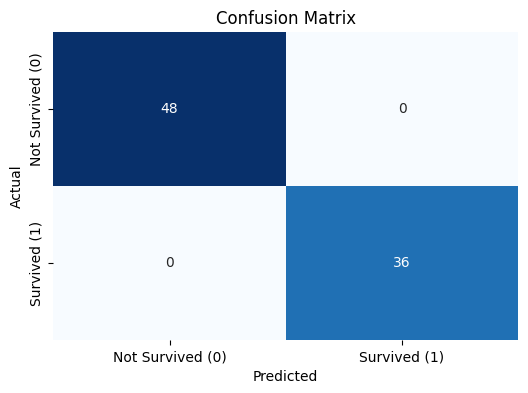

In [28]:
#11:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived (0)', 'Survived (1)'],
            yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
#12:
print("\nOverfitting Check:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
if train_accuracy - test_accuracy > 0.1:
    print("Warning: Potential overfitting detected (large gap between training and test accuracy).")
else:
    print("No significant overfitting detected (training and test accuracy are close).")


Overfitting Check:
Training Accuracy: 1.0000
Test Accuracy: 1.0000
No significant overfitting detected (training and test accuracy are close).


In [30]:
#13:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

In [31]:
#14:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

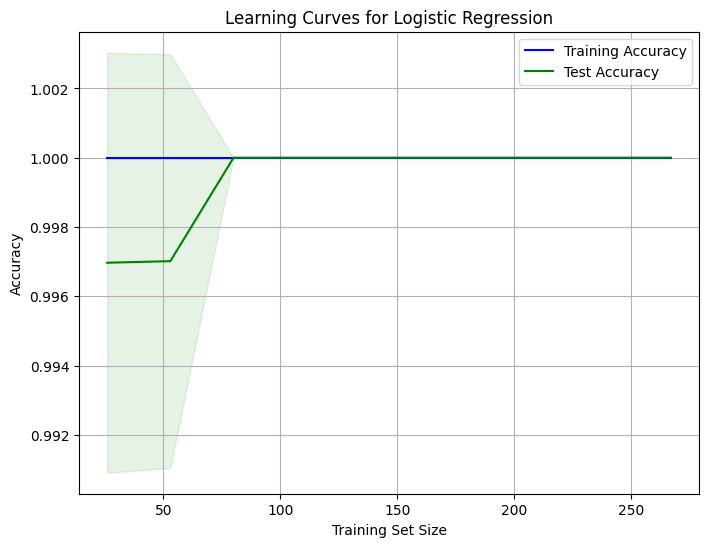


Learning Curve Interpretation:
If the training accuracy is high and test accuracy is much lower, the model may be overfitting.
If both accuracies are low, the model may be underfitting.
If both accuracies are close and high, the model is well-balanced.


In [32]:
#15:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test Accuracy', color='green')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.title('Learning Curves for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print("\nLearning Curve Interpretation:")
print("If the training accuracy is high and test accuracy is much lower, the model may be overfitting.")
print("If both accuracies are low, the model may be underfitting.")
print("If both accuracies are close and high, the model is well-balanced.")